In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
#reading the dataset and encoding it  
df1=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv')

## Data Exploration

In [3]:
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
print('Shape of the Dataset : ',df1.shape)

Shape of the Dataset :  (9551, 21)


In [5]:
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Checking for null values

In [7]:
df1.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

No null values here

Checking for duplicate values

In [8]:
df1.duplicated().sum()

0

In [9]:
# Review descriptive data
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [10]:
df_country = pd.read_excel('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [11]:
df=pd.merge(df1, df_country, on= 'Country Code', how= 'left')   #so we can get a final df with country name 
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [12]:
#droping unwanted columns
df.drop(['Restaurant ID','Country Code','Locality Verbose','Longitude','Latitude'],axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   City                  9551 non-null   object 
 2   Address               9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   Cuisines              9542 non-null   object 
 5   Average Cost for two  9551 non-null   int64  
 6   Currency              9551 non-null   object 
 7   Has Table booking     9551 non-null   object 
 8   Has Online delivery   9551 non-null   object 
 9   Is delivering now     9551 non-null   object 
 10  Switch to order menu  9551 non-null   object 
 11  Price range           9551 non-null   int64  
 12  Aggregate rating      9551 non-null   float64
 13  Rating color          9551 non-null   object 
 14  Rating text           9551 non-null   object 
 15  Votes                

## Table filter using Interact function

The interact function (ipywidgets.interact) automatically creates user interface (UI) controls for exploring code and data interactively. It is the easiest way to get started using IPython’s widgets.

In [14]:
from ipywidgets import interact

### Filter by Rating

In [15]:
@interact
def filter_rating (rating=(0,5,1)):
    return df[df['Aggregate rating']<rating].head().style.background_gradient(cmap='Blues')

interactive(children=(IntSlider(value=2, description='rating', max=5), Output()), _dom_classes=('widget-intera…

### Filter by Country

In [16]:
@interact
def filter_country(Country=list(df.Country.unique())):
    return df[df.Country==Country].head().style.background_gradient(cmap='Greens')

interactive(children=(Dropdown(description='Country', options=('Phillipines', 'Brazil', 'United States', 'Aust…

In [17]:
top_3 = df['Country'].value_counts()[:3]
top_3

India             8652
United States      434
United Kingdom      80
Name: Country, dtype: int64

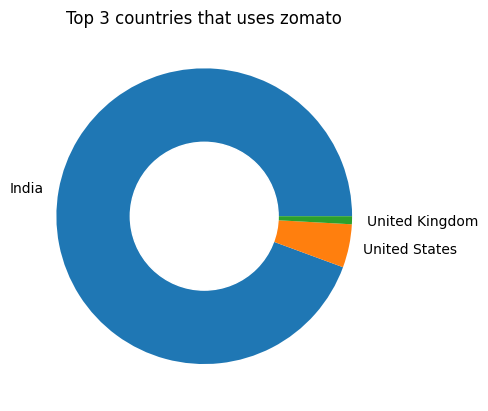

In [18]:
plt.pie(top_3,labels=top_3.index)                  #Plotting Pie Chart
circle = plt.Circle( (0,0), 0.5, color='white')    #Creating a Circle 
p=plt.gcf()                                        #Adding circle to the Pie Chart
p.gca().add_artist(circle)
plt.title("Top 3 countries that uses zomato")      #Add title

plt.show()

The top 3 countries that uses zomato are India, United States and United Kingdom

### Top 10 countries that uses zomato

In [19]:
top_10 = df['Country'].value_counts()[:10].rename_axis('Country').reset_index(name='count')
df_c=pd.DataFrame(top_10)    #converting it into dataframe.
top_10.style.background_gradient(cmap='Blues_r')

,Country,count
0,India,8652
1,United States,434
2,United Kingdom,80
3,Brazil,60
4,UAE,60
5,South Africa,60
6,New Zealand,40
7,Turkey,34
8,Australia,24
9,Phillipines,22


<AxesSubplot: xlabel='count', ylabel='Country'>

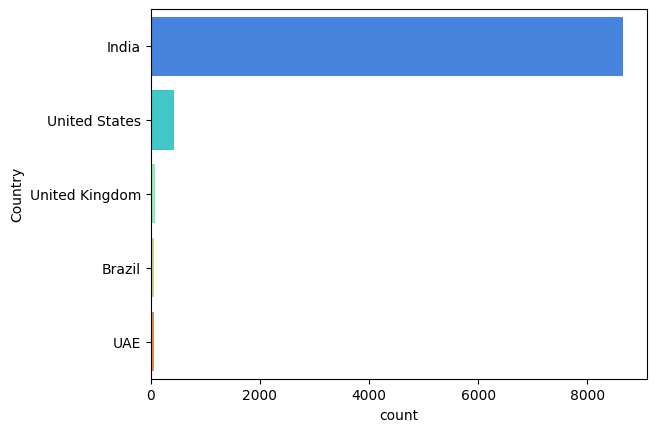

In [20]:
sns.barplot(data=df_c.head(5),y='Country',x='count',palette='rainbow')

### Countries with minimun transactions

In [21]:
df['Country'].value_counts()[-3:].rename_axis('Country').reset_index(name='count').style.background_gradient(cmap='Blues')

,Country,count
0,Qatar,20
1,Sri Lanka,20
2,Canada,4


### Most popular Cuisines

In [22]:
popular_cuisines=df['Cuisines'].value_counts()[:10].rename_axis('Cuisines').reset_index(name='count')
popular_cuisines.style.background_gradient(cmap='Blues_r')

,Cuisines,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


<AxesSubplot: title={'center': 'Most popular Cuisines'}, xlabel='count', ylabel='Cuisines'>

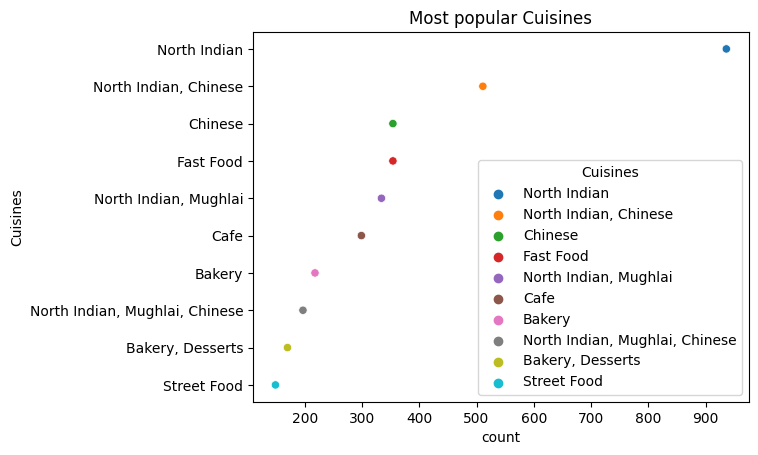

In [23]:
plt.title("Most popular Cuisines")   #add title

sns.scatterplot(y=popular_cuisines['Cuisines'],x=popular_cuisines['count'],hue=popular_cuisines['Cuisines'])

the top most popular Cuisines are North Indian and chinese 

In [24]:
# Analysing 'Has Online delivery' column

df['Has Online delivery' ].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

Most of the restaurants have no online delivery

<AxesSubplot: xlabel='count', ylabel='Has Online delivery'>

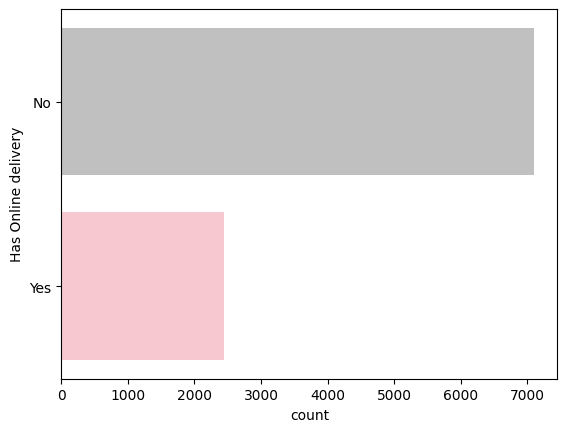

In [25]:
sns.countplot(y='Has Online delivery',data=df,palette=['silver','pink'])

In [26]:
# Which Countries do have online deliveries option

df[df['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

Online Deliveries are availabe only in india and UAE

<AxesSubplot: xlabel='count', ylabel='Rating color'>

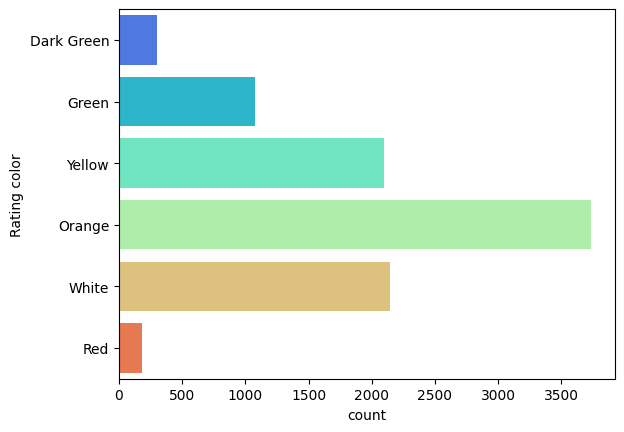

In [27]:
# Analysing 'Rating color' column

sns.countplot(y='Rating color',data=df,palette='rainbow')

In [28]:
# Analysing 'Average Cost for two' column

by_rating=df.groupby(['Rating color']).mean().round()
by_rating

,Average Cost for two,Price range,Aggregate rating,Votes
Rating color,,,,
Dark Green,8137.0,3.0,5.0,852.0
Green,3556.0,3.0,4.0,520.0
Orange,568.0,2.0,3.0,48.0
Red,638.0,2.0,2.0,91.0
White,340.0,1.0,0.0,1.0
Yellow,1045.0,2.0,4.0,229.0


<AxesSubplot: title={'center': 'Aggregate rating vs Average Cost for two'}, xlabel='Aggregate rating', ylabel='Average Cost for two'>

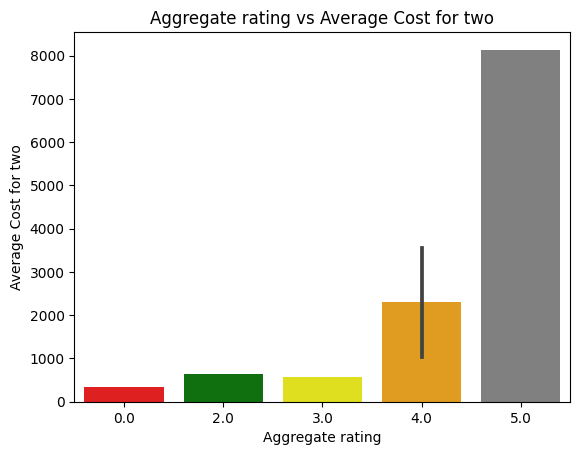

In [29]:
plt.title("Aggregate rating vs Average Cost for two")     #Add title

sns.barplot(x=by_rating['Aggregate rating'],y=by_rating['Average Cost for two'],palette=['red','green','yellow','orange','grey'])

Top rated restaurants have high average cost

<AxesSubplot: title={'center': 'Rating text vs Average Cost for two'}, xlabel='Rating text', ylabel='Average Cost for two'>

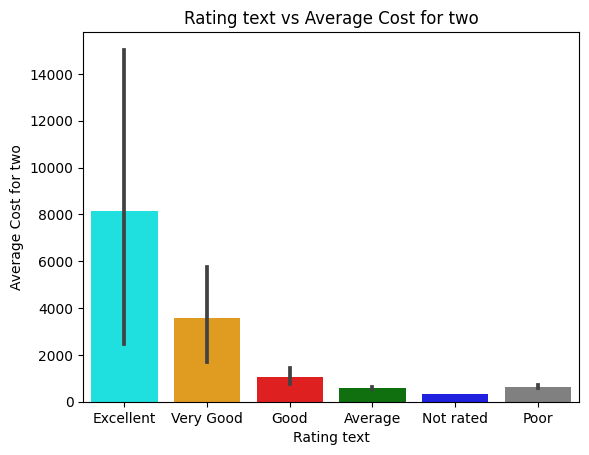

In [30]:
# Analysing 'Rating text' column

plt.title("Rating text vs Average Cost for two")     #Add title
sns.barplot(x=df['Rating text'],y=df['Average Cost for two'],palette=['cyan','orange', 'red', 'green', 'blue','grey'])

### Combining different features

In [31]:
# to create a table with selected features for better understanding
df.groupby(['Rating color','Aggregate rating','Rating text']).mean().style.background_gradient(cmap='Blues')

## Conclusion

In [32]:
pd.options.plotting.backend='plotly'

In [33]:
@interact
def filter_country(Country=list(df.Country.unique())):
    filtered_df=df[df.Country==Country]
    
    fig=filtered_df.plot(kind='scatter',x='Aggregate rating',y='Price range',color='City',size='Votes')
    fig.show()

interactive(children=(Dropdown(description='Country', options=('Phillipines', 'Brazil', 'United States', 'Aust…